In [ ]:
pip install pandas matplotlib seaborn

In [11]:
import pandas as pd
import zipfile
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
zip_file_path = "C:/Users/akars/Downloads/archive.zip"
extract_folder = "C:/Users/akars/Downloads/Fitabase Data 4.12.16-5.12.16"

In [13]:
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

In [14]:
extracted_files = [f for f in os.listdir(extract_folder) if f.endswith('.csv') or f.endswith('.xlsx') or f.endswith('.xls')]

In [15]:
dfs = {}
for file in extracted_files:
    file_path = os.path.join(extract_folder,file)
    df_name = os.path.splitext(file)[0]
    dfs[df_name] = pd.read_csv(file_path)

Top 10 people data:
             Id ActivityDay  StepTotal
50   1624580081  2016-05-01      36019
913  8877689391  2016-04-16      29326
927  8877689391  2016-04-30      27745
924  8877689391  2016-04-27      23629
909  8877689391  2016-04-12      23186
780  8053475328  2016-04-24      22988
437  4388161847  2016-05-07      22770
779  8053475328  2016-04-23      22359
251  2347167796  2016-04-16      22244
794  8053475328  2016-05-08      22026


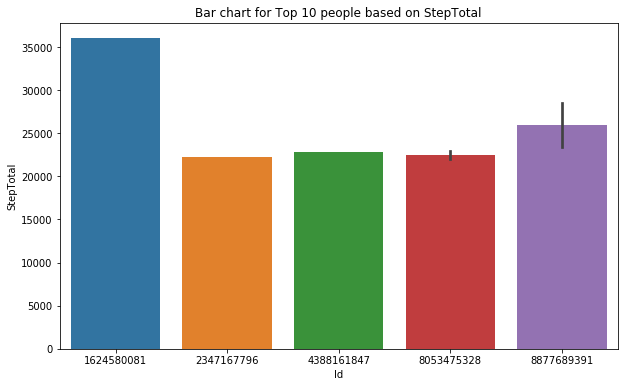

In [16]:
#Barplot for dailySteps_merged
if 'dailySteps_merged' in dfs:
    dfs['dailySteps_merged']['ActivityDay'] = pd.to_datetime(dfs['dailySteps_merged']['ActivityDay'])
    top_10_people = dfs['dailySteps_merged'].sort_values(by='StepTotal',ascending = False).head(10)
    print("Top 10 people data:")
    print(top_10_people)
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Id', y='StepTotal', data=top_10_people)
    plt.title('Bar chart for Top 10 people based on StepTotal')
    plt.xlabel('Id')
    plt.ylabel('StepTotal')
    plt.show()
else:
    print("dailySteps_merged DataFrame not found in the loaded DataFrames.")

Top 10 people data for hourlyCalories_merged:
Id
8378563200    106427
8877689391    105746
5577150313    100816
4388161847     94167
4702921684     91891
8053475328     91310
1644430081     84125
8583815059     79402
7086361926     79341
2022484408     77633
Name: Calories, dtype: int64


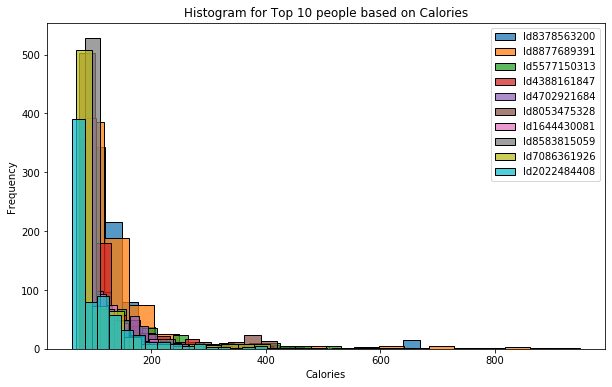

In [17]:
#Histogram for hourlyCalories_merged
if 'hourlyCalories_merged' in dfs:
    top_10_people_calories = dfs['hourlyCalories_merged'].groupby('Id')['Calories'].sum().sort_values(ascending=False).head(10)
    print("Top 10 people data for hourlyCalories_merged:")
    print(top_10_people_calories)
    plt.figure(figsize=(10,6))
    for id_value in top_10_people_calories.index:
        data_for_id = dfs['hourlyCalories_merged'][dfs['hourlyCalories_merged']['Id'] == id_value]['Calories']
        sns.histplot(data_for_id,bins=20,kde=False,label=f'Id{id_value}')
    plt.title('Histogram for Top 10 people based on Calories')
    plt.xlabel('Calories')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()
else:
    print("hourlyCalories_merged DataFrame not found in the loaded DataFrames.")

Top 10 people data for weightLogInfo_merged based on BMI:
            Id                   Date    WeightKg  WeightPounds   Fat  \
2   1927972279   4/13/2016 1:08:52 AM  133.500000    294.317120   NaN   
12  5577150313   4/17/2016 9:17:55 AM   90.699997    199.959265   NaN   
8   4558609924  4/25/2016 11:59:59 PM   70.300003    154.984977   NaN   
5   4319703577  4/17/2016 11:59:59 PM   72.400002    159.614681  25.0   
6   4319703577   5/4/2016 11:59:59 PM   72.300003    159.394222   NaN   
9   4558609924   5/1/2016 11:59:59 PM   69.900002    154.103125   NaN   
7   4558609924  4/18/2016 11:59:59 PM   69.699997    153.662190   NaN   
10  4558609924   5/2/2016 11:59:59 PM   69.199997    152.559879   NaN   
11  4558609924   5/9/2016 11:59:59 PM   69.099998    152.339420   NaN   
43  8877689391   4/12/2016 6:47:11 AM   85.800003    189.156628   NaN   

          BMI  IsManualReport          LogId  
2   47.540001           False  1460509732000  
12  28.000000           False  1460884675000

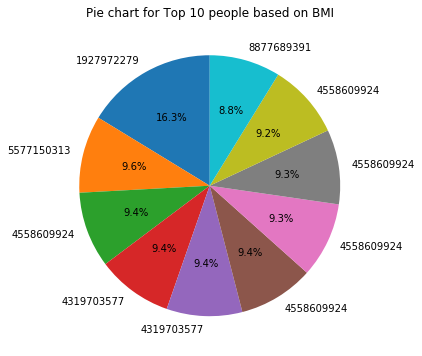

In [18]:
#PieChart for weightLogInfo_merged
if 'weightLogInfo_merged' in dfs:
    top_10_bmi = dfs['weightLogInfo_merged'].sort_values(by='BMI',ascending=False).head(10)
    print("Top 10 people data for weightLogInfo_merged based on BMI:")
    print(top_10_bmi)
    plt.figure(figsize=(10,6))
    plt.pie(top_10_bmi['BMI'],labels=top_10_bmi['Id'],autopct='%1.1f%%',startangle=90)
    plt.title('Pie chart for Top 10 people based on BMI')
    plt.show()
else:
    print("weightLogInfo_merged DataFrame not found in the loaded DataFrames.")
    

Top 10 people data for heartrate_seconds_merged based on Value:
               Id                  Time  Value
49422  2022484408  4/21/2016 5:06:05 PM    203
49265  2022484408  4/21/2016 4:32:20 PM    203
49421  2022484408  4/21/2016 5:05:50 PM    203
49261  2022484408  4/21/2016 4:31:40 PM    203
49266  2022484408  4/21/2016 4:32:35 PM    203
49423  2022484408  4/21/2016 5:06:20 PM    203
49263  2022484408  4/21/2016 4:32:00 PM    203
49264  2022484408  4/21/2016 4:32:10 PM    203
49424  2022484408  4/21/2016 5:06:30 PM    202
49260  2022484408  4/21/2016 4:31:30 PM    202


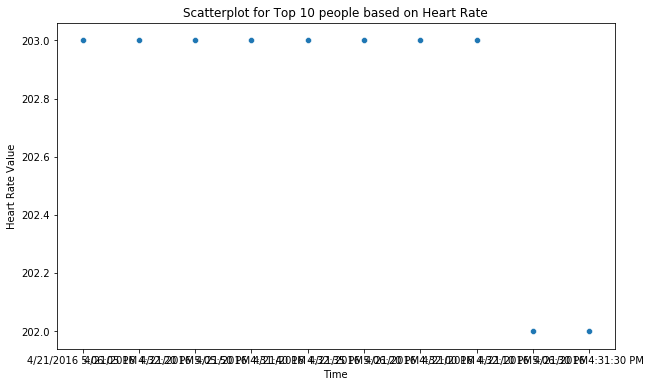

In [19]:
#Scatterplot for heartrate_seconds_merged
if 'heartrate_seconds_merged' in dfs:
    top_10_heart_rate = dfs['heartrate_seconds_merged'].sort_values(by='Value',ascending=False).head(10)
    print("Top 10 people data for heartrate_seconds_merged based on Value:")
    print(top_10_heart_rate)
    plt.figure(figsize=(10,6))
    sns.scatterplot(x='Time',y='Value',data=top_10_heart_rate)
    plt.title('Scatterplot for Top 10 people based on Heart Rate')
    plt.xlabel('Time')
    plt.ylabel('Heart Rate Value')
    plt.show()
else:
    print("heartrate_seconds_merged DataFrame not found in the loaded DataFrames.")
    

Top 10 rows for minuteIntensitiesNarrow_merged:
            Id         ActivityMinute  Intensity
25  1503960366  4/12/2016 12:25:00 AM          1
29  1503960366  4/12/2016 12:29:00 AM          1
34  1503960366  4/12/2016 12:34:00 AM          1
35  1503960366  4/12/2016 12:35:00 AM          1
36  1503960366  4/12/2016 12:36:00 AM          1
37  1503960366  4/12/2016 12:37:00 AM          1
38  1503960366  4/12/2016 12:38:00 AM          1
39  1503960366  4/12/2016 12:39:00 AM          1
40  1503960366  4/12/2016 12:40:00 AM          1
41  1503960366  4/12/2016 12:41:00 AM          1


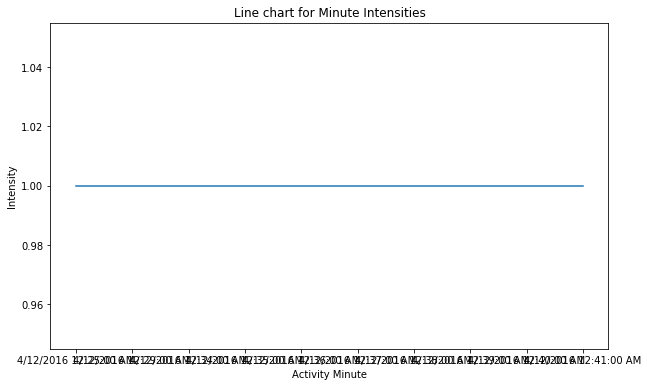

In [25]:
# Line chart for minuteIntensitiesNarrow_merged
if 'minuteIntensitiesNarrow_merged' in dfs:
    top_10_minute_intensities = dfs['minuteIntensitiesNarrow_merged'][dfs['minuteIntensitiesNarrow_merged']['Intensity'] == 1].head(10)
    print("Top 10 rows for minuteIntensitiesNarrow_merged:")
    print(top_10_minute_intensities)
    plt.figure(figsize=(10,6))
    sns.lineplot(x='ActivityMinute',y='Intensity',data=top_10_minute_intensities)
    plt.title('Line chart for Minute Intensities')
    plt.xlabel('Activity Minute')
    plt.ylabel('Intensity')
    plt.show()
else:
    print("minuteIntensitiesNarrow_merged DataFrame not found in the loaded DataFrames.")
                 

Top 10 people data for sleepDay_merged based on TotalTimeInBed:
             Id               SleepDay  TotalSleepRecords  TotalMinutesAsleep  \
31   1844505072   5/1/2016 12:00:00 AM                  1                 590   
30   1844505072  4/30/2016 12:00:00 AM                  1                 722   
29   1844505072  4/15/2016 12:00:00 AM                  1                 644   
27   1644430081   5/2/2016 12:00:00 AM                  1                 796   
246  5553957443  4/30/2016 12:00:00 AM                  2                 775   
32   1927972279  4/12/2016 12:00:00 AM                  3                 750   
239  5553957443  4/23/2016 12:00:00 AM                  2                 631   
125  4319703577  4/23/2016 12:00:00 AM                  1                 692   
4    1503960366  4/17/2016 12:00:00 AM                  1                 700   
347  7086361926  4/24/2016 12:00:00 AM                  1                 681   

     TotalTimeInBed  
31              961  


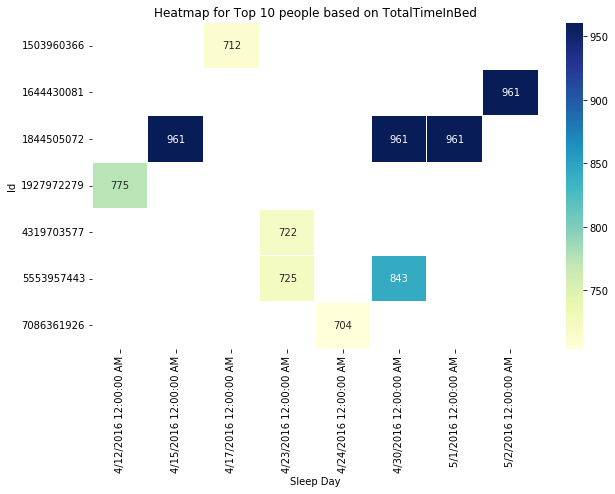

In [27]:
#Heatmap for sleepday_merged
if 'sleepDay_merged' in dfs:
    top_10_time_in_bed = dfs['sleepDay_merged'].sort_values(by='TotalTimeInBed',ascending=False).head(10)
    print("Top 10 people data for sleepDay_merged based on TotalTimeInBed:")
    print(top_10_time_in_bed)
    plt.figure(figsize=(10,6))
    sleep_data = top_10_time_in_bed.pivot('Id','SleepDay','TotalTimeInBed')
    sns.heatmap(sleep_data,cmap='YlGnBu',annot=True,fmt='g',linewidths=.5)
    plt.title('Heatmap for Top 10 people based on TotalTimeInBed')
    plt.xlabel('Sleep Day')
    plt.ylabel('Id')
    plt.show()
else:
    print("sleepDay_merged DataFrame not found in the loaded DataFrames.")